In [1]:
import pandas as pd
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
csv = pd.read_csv('./labels.csv', encoding='utf8')
imgRoot = '/home/chenxi/dataset/huawei_scene_labeling/resized256/'

In [3]:
name2id = dict()
files = []
columns = csv.columns
records = []

for idx, val in csv.iterrows():
    filePath = imgRoot + val[columns[0]].strip() + '.jpg'
    if not os.path.exists(filePath):
        print(filePath)
        continue
    
    files.append(os.path.basename(filePath))
    one = []
    for i in range(1, len(columns)):
        ref = columns[i]
        try:
            if np.isnan(val[ref]):
                break
        except:
            label = val[ref].strip()
            if not label in name2id:
                name2id[label] = len(name2id)
            one.append(name2id[label])
    records.append(one)

assert(len(files) == len(records))
keys = OrderedDict(sorted(name2id.items(), key=lambda v: v[1])).keys()
data = np.zeros((len(files), len(keys)))
for i, r in enumerate(records):
    for idx in r:
        data[i][idx] = 1

/home/chenxi/dataset/huawei_scene_labeling/resized256/A0126.jpg
/home/chenxi/dataset/huawei_scene_labeling/resized256/A0427.jpg
/home/chenxi/dataset/huawei_scene_labeling/resized256/A1064.jpg
/home/chenxi/dataset/huawei_scene_labeling/resized256/A1339.jpg
/home/chenxi/dataset/huawei_scene_labeling/resized256/A3224.jpg
/home/chenxi/dataset/huawei_scene_labeling/resized256/A4082.jpg
/home/chenxi/dataset/huawei_scene_labeling/resized256/A4105.jpg
/home/chenxi/dataset/huawei_scene_labeling/resized256/A4843.jpg
/home/chenxi/dataset/huawei_scene_labeling/resized256/A4844.jpg
/home/chenxi/dataset/huawei_scene_labeling/resized256/A4845.jpg
/home/chenxi/dataset/huawei_scene_labeling/resized256/A4846.jpg
/home/chenxi/dataset/huawei_scene_labeling/resized256/A4847.jpg
/home/chenxi/dataset/huawei_scene_labeling/resized256/A4848.jpg
/home/chenxi/dataset/huawei_scene_labeling/resized256/A4849.jpg
/home/chenxi/dataset/huawei_scene_labeling/resized256/A4850.jpg
/home/chenxi/dataset/huawei_scene_labeli

In [4]:
counts = np.sum(data, 0).astype('int')
filter_cols = np.arange(len(counts))[counts > 1]
key_filter = [keys[i] for i in range(len(keys)) if i in filter_cols]
data_filter = data[:, filter_cols]

# shuffle
perm = np.random.permutation(len(data_filter))
data_shuffle = np.array([data[idx] for idx in perm])
files_shuffle = [files[idx] for idx in perm]

In [5]:
nTrainSamples = int(len(data) * 0.8)

trainSamples = data_shuffle[:nTrainSamples].astype('int')
trainFiles = files_shuffle[:nTrainSamples]
valSamples = data_shuffle[nTrainSamples:].astype('int')
valFiles = files_shuffle[nTrainSamples:]

In [6]:
distTrain = np.sum(trainSamples, 0) * 1.0 / np.sum(trainSamples)
distVal = np.sum(valSamples, 0) * 1.0 / np.sum(valSamples)
print(distTrain)
print(distVal)

[ 0.32802249  0.25716963  0.02155576  0.10121837  0.02530459  0.00243674
  0.01480787  0.0076851   0.0950328   0.05979381  0.00880975  0.06710403
  0.0099344   0.00112465  0.        ]
[ 0.31678832  0.25620438  0.0270073   0.09635036  0.02335766  0.00291971
  0.02408759  0.01386861  0.09051095  0.05547445  0.01021898  0.07007299
  0.01094891  0.00145985  0.00072993]


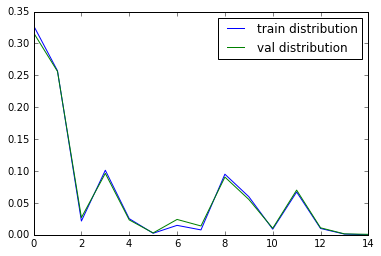

In [7]:
plt.figure()
plt.plot(distTrain, label = 'train distribution')
plt.plot(distVal, label='val distribution')
plt.legend(loc='best')
plt.savefig('dist.jpg')
plt.show()

In [8]:
trainDict = OrderedDict()
trainDict['ImageName'] = trainFiles
for col, key in enumerate(key_filter):
    trainDict[key] = trainSamples[:, col]
dfTrain = pd.DataFrame(trainDict)
print(dfTrain.shape)


valDict = OrderedDict()
valDict['ImageName'] = valFiles
for col, key in enumerate(key_filter):
    valDict[key] = valSamples[:, col]
dfVal = pd.DataFrame(valDict)
print(dfVal.shape)

(4040, 15)
(1011, 15)


In [9]:
dfTrain.to_csv('/home/chenxi/dataset/huawei_scene_labeling/train.labels', header=False, index=False, sep=' ')
dfVal.to_csv('/home/chenxi/dataset/huawei_scene_labeling/val.labels', header=False, index=False, sep=' ')